# Day and night image classifier

In [1]:
# import resources and libraries
import cv2 # computer vision library
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
## Training and Testing data
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

## Load the dataset

In [3]:
# using the load_dataset function in helper.py
# load training data
IMAGE_LIST=helpers.load_dataset(image_dir_training)


## Construct a standardized_List of input images and output label

In [4]:
# this function takes a list of image-label pair and output a standardized list of resized images and numerical labels
# standardized all training images
STANDARDIZED_LIST=helpers.standardize(IMAGE_LIST)

## Visualize the standardize data

shape:(600, 1100, 3)
Label [1=day,0=Night]: 1


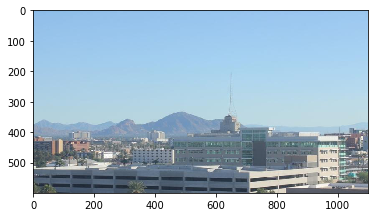

In [5]:
# Display a standardize jimage and its label
# select an image by index
image_num=0
selected_image=STANDARDIZED_LIST[image_num][0]
selected_label=STANDARDIZED_LIST[image_num][1]

#DISPLAY IMAGE AND DATA ABOUT IT
plt.imshow(selected_image)
print('shape:'+str(selected_image.shape))
print('Label [1=day,0=Night]: '+str(selected_label))


## Feature extraction
<p>Create a feature that represents the brightness in an image. We'll be extracting the average brightness using HSV colorspace. Specifically, we'll use the V channel (a measure of brightness), add up the pixel values in the V channel, then divide that sum by the area of the image to get the average Value of the image.</p>


### Find the average brightness using the V channel
<p>This function takes in a standardized RGB image and returns a feature (a single value) that represent the average level of brightness in the image. We'll use this value to classify the image as day or night.</p>

In [10]:
# Find the average value or brightness of a picture

def avg_brightness(rgb_image):
    # Convert Image to HSV
    hsv=cv2.cvtColor(rgb_image,cv2.COLOR_RGB2HSV)
    
    # Add up all the pixal values in the V channel
    
    sum_brightness=np.sum(hsv[:,:,2])
    area=600*1100.0 # pixals
    
    # find the average
    avg=sum_brightness/area
    return avg

Average Brightness119.6223


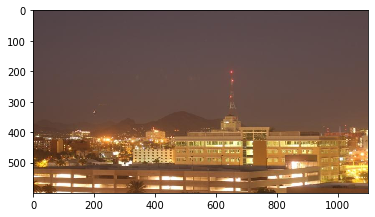

In [19]:
# Testing average brightness level
# Look at a number of different day and night images and think about
# What average brightness value seperates the two types of images

# As a example a "night " image is loaded in and its avg brightness is displayed
image_num=120
test_im=STANDARDIZED_LIST[image_num][0]
avg=avg_brightness(test_im)
print('Average Brightness'+str(avg))
plt.imshow(test_im)

In [30]:
# Find out the threshold value 

arr=[]
for i in range(0,240):
    selected_image=STANDARDIZED_LIST[i][0]
    
    arr.append(avg_brightness(selected_image))

print(sum(arr)/240)

    

103.28939957702013


## Classification and Visualization Error

<p>In this section, we'll turn our average brightness feature into a classifier that takes in a standardized image and returns a predicted_label for that image. This estimate_label function should return a value: 0 or 1 (night or day, respectively).</p>

## Build a complete classifier



In [37]:
threshold=103

# this function should take RGB image input
def estimate_label(rgb_image):
    # Extract average brightness feature from an RGB image
    avg=avg_brightness(rgb_image)
    # Use the avg brightness feature to predict a label(0,1)
    predicted_label=0
    if(avg>threshold):
        # if average brightness is above the threshold value ,'We classify it as day'
        predicted_label=1
        # else Night
    return predicted_label

## Testing the classifier
<p>Here is where we test your classification algorithm using our test set of data that we set aside at the beginning of the notebook!

Since we are using a pretty simple brightess feature, we may not expect this classifier to be 100% accurate. We'll aim for around 75-85% accuracy usin this one feature.</p>

### Test dataset

In [38]:
import random

# Load test data
TEST_IMAGE_LIST=helpers.load_dataset(image_dir_test)

# Standardize the test data
STANDARDIZED_TEST_LIST=helpers.standardize(TEST_IMAGE_LIST)
# shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

## Determine the accuracy

<p>Compare the output of your classification algorithm (a.k.a. your "model") with the true labels and determine the accuracy.

This code stores all the misclassified images, their predicted labels, and their true labels, in a list called misclassified.</p>

In [39]:
# construct a list of misclassified image given 
# a list of test images and their labels
def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclacified_images_labels=[]
    
    # iterate through all the test images
    # classify each images and compare to the true label
    
    for image in test_images:
        # get true data
        im=image[0]
        true_label=image[1]
        
        # get predicted label from your classifier
        predicted_label=estimate_label(im)
        # Compare true and predicted labels
        if (predicted_label!=true_label):
            misclacified_images_labels.append((im,predicted_label,true_label))
            
    # return the list of misclassified images
    return misclacified_images_labels

In [40]:
# find all misclassified images in a given test set
MISCLASSIFIED=get_misclassified_images(STANDARDIZED_TEST_LIST)
# accuracy calculation
total=len(STANDARDIZED_TEST_LIST)
num_correct=total-len(MISCLASSIFIED)
accuracy=num_correct/total*100
print('Accuracy: '+str(accuracy)+'%')
print('Nuber of misclassified images ='+str(len(MISCLASSIFIED))+' out of '+str(total))

Accuracy: 92.5%
Nuber of misclassified images =12 out of 160


## Visualization of misclassified images after threshold optimization
